<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#First-task" data-toc-modified-id="First-task-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>First task</a></span><ul class="toc-item"><li><span><a href="#Accepted-and-rejected-major-product_names" data-toc-modified-id="Accepted-and-rejected-major-product_names-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Accepted and rejected major product_names</a></span></li><li><span><a href="#Prospective-industries-the-prompt-template-fails-(blue)-and-works-(orange)" data-toc-modified-id="Prospective-industries-the-prompt-template-fails-(blue)-and-works-(orange)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Prospective industries the prompt template fails (blue) and works (orange)</a></span></li></ul></li><li><span><a href="#second-task" data-toc-modified-id="second-task-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>second task</a></span><ul class="toc-item"><li><span><a href="#Find-topics-on-critique-messages-on-failed-outputs" data-toc-modified-id="Find-topics-on-critique-messages-on-failed-outputs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Find topics on critique messages on failed outputs</a></span></li></ul></li></ul></div>

In [169]:
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

dataset_path = "final_mle_dataset.json"

assert os.path.exists(dataset_path)

with open(dataset_path, 'r') as file:
    data = json.load(file)

input_df = pd.DataFrame(data)


In [133]:
input_df.head()

,product_name,product_description,prospect_name,prospect_industry,prospect_title,email,accepted,critique,edited,email_embedding,edited_embedding
0,Fitness Tracker,A wearable device that tracks your daily activ...,Emily Nguyen,Healthcare,Nurse Practitioner,"\nHello Emily,\n\nThank you for your email! I ...",False,The email does not address Emily's needs. It a...,"Hello Emily,\n\nI was thrilled to receive your...","[-0.0205299723893404, 0.010440289042890072, 0....","[-0.022002264857292175, 0.008491870947182178, ..."
1,Wireless Earbuds,Sleek and comfortable earbuds with noise-cance...,David Lee,Finance,Financial Analyst,"\nHello David,\n\nI hope you are doing well! I...",False,The email lacks a human touch and seems spammy...,"Hello David,\n\nI hope this email finds you we...","[-0.02587042935192585, 0.008525044657289982, -...","[-0.024318786337971687, 0.009196070022881031, ..."
2,Smart Thermostat,A thermostat that learns your preferred temper...,Sarah Kim,Education,Teacher,"\nHello Sarah,\n\nThank you for reaching out t...",False,The email fails to provide any information tha...,"Hi Sarah, Thank you for showing interest in ou...","[-0.01127349678426981, -0.0051771956495940685,...","[0.010906320065259933, 0.002942352555692196, -..."
3,Smart Lock,A keyless lock that can be controlled remotely...,Michael Brown,Security,Security Officer,"\nHello Michael,\n\nI hope this email finds yo...",False,The email is too formal and robotic. It doesn'...,"Hi Michael,\n\nI hope this email finds you wel...","[-0.016323497518897057, -0.01875770278275013, ...","[-0.014479351229965687, -0.018625592812895775,..."
4,Wireless Charger,A convenient wireless charger that can charge ...,Karen Wilson,Marketing,Marketing Manager,"\nHello Karen,\n\nThank you for considering ou...",False,The email does not provide any relevant inform...,"Hello Karen,\n\nAs a Marketing Manager, we und...","[-0.00021778080554213375, 0.008959198370575905...","[-0.007856832817196846, -0.0006581320194527507..."


## First task

Get accepted and not accepted outputs

In [81]:
accepted_df = input_df[input_df['accepted'] == True]
rejected_df = input_df[input_df['accepted'] == False]

Analyze them individually on product name's, prospect industy, product industry (future TODO using topic modelling)

In [82]:
print(f"Total unique product_name = {input_df['product_name'].unique().shape[0]}")
print(f"Accepted unique product_name = {accepted_df['product_name'].unique().shape[0]}")
print(f"Rejected unique product_name = {rejected_df['product_name'].unique().shape[0]}")


Total unique product_name = 166
Accepted unique product_name = 131
Rejected unique product_name = 119


In [213]:
def plot_value_counts_on_column(all_df, input_df, title=None, column_name='product_name', count_threshold=10, percent_threshold=0.2, plot=True):
    total_val_counts = all_df[column_name].value_counts()
    df = input_df[[column_name]].apply(pd.value_counts).reset_index().rename(columns={column_name: 'count', 'index': column_name})
    df['count'] = pd.to_numeric(df["count"])
    df = df[df['count'] > count_threshold]
    for index, row in df.iterrows():
        df.at[index,'count'] = row['count'] / total_val_counts[row[column_name]]
    df = df[df['count'] > percent_threshold]
    
    if plot:
        sns.color_palette("Set2")
        sns.barplot(data=df, x="product_name", y="count")
        plt.xticks(rotation = 75)
        plt.xlabel(f'product names with more than {count_threshold} entries')
        plt.ylabel('percentage of occurrence')
        plt.title(title)
        plt.show()
    return df
    

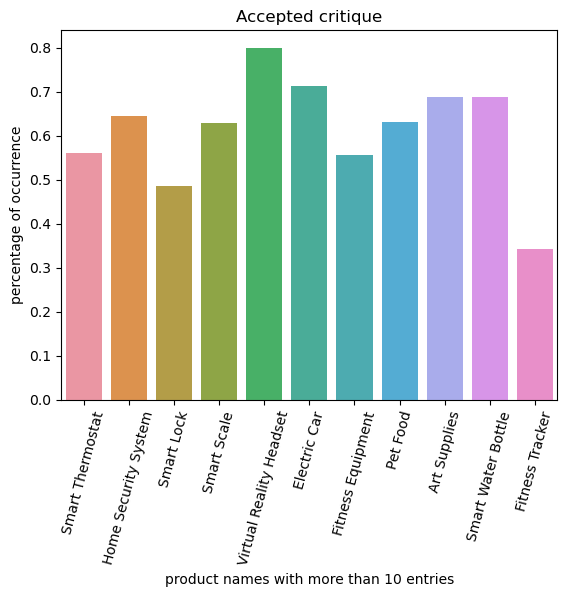

In [228]:
# Accepted entries have the following product_names in majority
value_count_percent_accepted_df = plot_value_counts_on_column(
    all_df=input_df,
    input_df=accepted_df,
    title='Accepted critique')

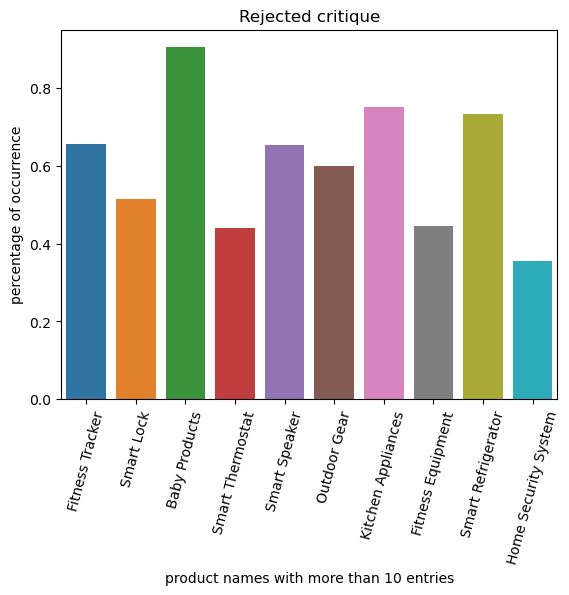

In [229]:
# Rejected entries have the following product_names in majority
value_count_percent_rejected_df = plot_value_counts_on_column(all_df=input_df,
    input_df=rejected_df, title='Rejected critique')

### Accepted and rejected major product_names

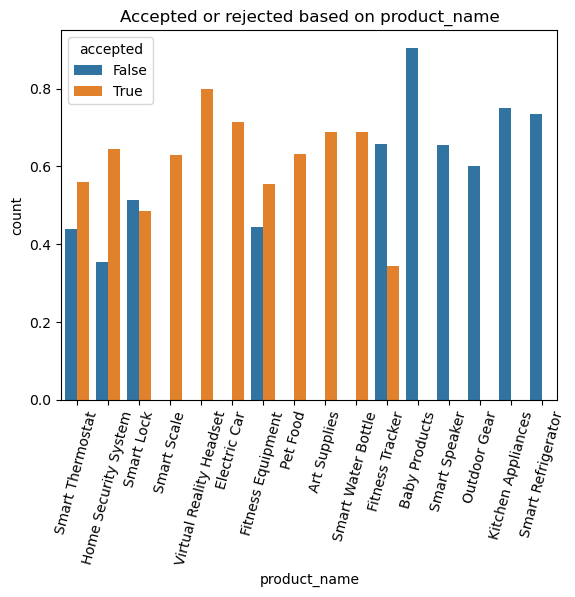

In [230]:
value_count_percent_accepted_df['accepted'] = True
value_count_percent_rejected_df['accepted'] = False
merged_value_count_df = pd.concat([value_count_percent_accepted_df, value_count_percent_rejected_df])
plt.xticks(rotation = 75)
sns.barplot(data=merged_value_count_df, x="product_name", y="count", hue='accepted')
plt.title('Accepted or rejected based on product_name')
plt.show()

### Prospective industries the prompt template fails (blue) and works (orange)

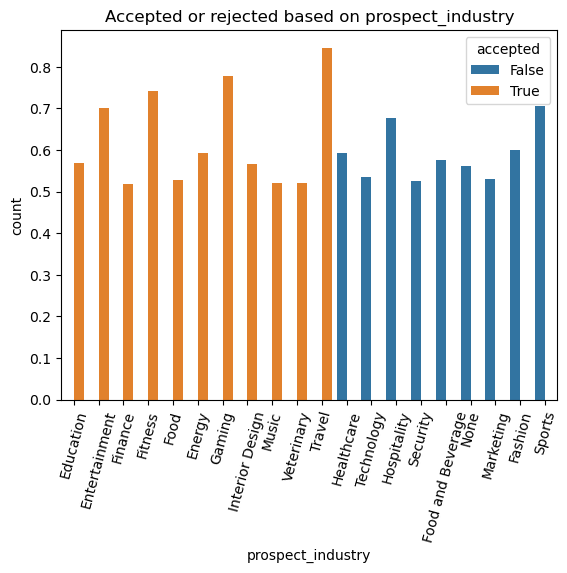

In [231]:
value_count_percent_accepted_df = plot_value_counts_on_column(all_df=input_df,
                                                              input_df=accepted_df,
                                                              column_name='prospect_industry',
                                                              percent_threshold=0.5,
                                                              plot=False
                                                             )
value_count_percent_rejected_df = plot_value_counts_on_column(all_df=input_df,
                                                              input_df=rejected_df,
                                                              column_name='prospect_industry',
                                                              percent_threshold=0.5,
                                                              plot=False
                                                             )
value_count_percent_accepted_df['accepted'] = True
value_count_percent_rejected_df['accepted'] = False
merged_value_count_df = pd.concat([value_count_percent_accepted_df, value_count_percent_rejected_df])
plt.xticks(rotation = 75)

sns.barplot(
    data=merged_value_count_df,
    x="prospect_industry",
    y="count",
    hue='accepted').set_title('Accepted or rejected based on prospect_industry')
plt.show()

## second task

### Find topics on critique messages on failed outputs

In [255]:
# We add this to remove stopwords
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(rejected_df['critique'].values)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2023-06-15 15:41:24,556 - BERTopic - Transformed documents to Embeddings
2023-06-15 15:41:28,820 - BERTopic - Reduced dimensionality
2023-06-15 15:41:28,845 - BERTopic - Clustered reduced embeddings


In [272]:

model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,432,0_email_does_needs_lacks,"[email, does, needs, lacks, specific, industry...",[The sales email does not seem to be targeted ...
1,1,61,1_email_chatbot_prospect_lacks,"[email, chatbot, prospect, lacks, impersonal, ...",[The email starts with an unprofessional intro...


In [277]:
model.get_document_info(rejected_df['critique'].values)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,The email does not address Emily's needs. It a...,0,0_email_does_needs_lacks,"[email, does, needs, lacks, specific, industry...",[The sales email does not seem to be targeted ...,email - does - needs - lacks - specific - indu...,0.908298,False
1,The email lacks a human touch and seems spammy...,1,1_email_chatbot_prospect_lacks,"[email, chatbot, prospect, lacks, impersonal, ...",[The email starts with an unprofessional intro...,email - chatbot - prospect - lacks - impersona...,1.000000,False
2,The email fails to provide any information tha...,0,0_email_does_needs_lacks,"[email, does, needs, lacks, specific, industry...",[The sales email does not seem to be targeted ...,email - does - needs - lacks - specific - indu...,0.898904,False
3,The email is too formal and robotic. It doesn'...,0,0_email_does_needs_lacks,"[email, does, needs, lacks, specific, industry...",[The sales email does not seem to be targeted ...,email - does - needs - lacks - specific - indu...,0.974955,False
4,The email does not provide any relevant inform...,0,0_email_does_needs_lacks,"[email, does, needs, lacks, specific, industry...",[The sales email does not seem to be targeted ...,email - does - needs - lacks - specific - indu...,0.899949,False
...,...,...,...,...,...,...,...,...
488,This email is generic and doesn't show an unde...,0,0_email_does_needs_lacks,"[email, does, needs, lacks, specific, industry...",[The sales email does not seem to be targeted ...,email - does - needs - lacks - specific - indu...,0.988025,False
489,The email is too generic and does not appear t...,0,0_email_does_needs_lacks,"[email, does, needs, lacks, specific, industry...",[The sales email does not seem to be targeted ...,email - does - needs - lacks - specific - indu...,0.866896,False
490,The email feels too generic and lacks empathy ...,1,1_email_chatbot_prospect_lacks,"[email, chatbot, prospect, lacks, impersonal, ...",[The email starts with an unprofessional intro...,email - chatbot - prospect - lacks - impersona...,1.000000,False
491,The email lacks personalization and does not s...,0,0_email_does_needs_lacks,"[email, does, needs, lacks, specific, industry...",[The sales email does not seem to be targeted ...,email - does - needs - lacks - specific - indu...,0.930716,False


In [275]:
print(model.get_topic(0))
print(model.get_topic(1))

[('email', 0.0982478116493817), ('does', 0.05351398235825136), ('needs', 0.05151891638779471), ('lacks', 0.05062931391149612), ('specific', 0.049308666462306215), ('industry', 0.048639366239348336), ('generic', 0.04856877204856835), ('product', 0.04407087015419629), ('prospects', 0.04109495388278479), ('doesnt', 0.040665728004748485)]
[('email', 0.10978250835536141), ('chatbot', 0.10853573302080222), ('prospect', 0.04983616447583699), ('lacks', 0.0419308754303017), ('impersonal', 0.03960489848521698), ('product', 0.035288339667046656), ('needs', 0.034807191062591246), ('does', 0.0332399546036564), ('prospects', 0.03228726817513519), ('use chatbot', 0.030335379385656423)]
